# 1. Preparation

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ID File from Google Drive
file_id = "1okfCoVFw7HpTO_fxfDOzas83SBt0G-oB"
# URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download to local
output = "creditcard.csv"
gdown.download(download_url, output, quiet=False)

# Load to pandas
df = pd.read_csv(output)
print("Dataset size:", df.shape)
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=1okfCoVFw7HpTO_fxfDOzas83SBt0G-oB
From (redirected): https://drive.google.com/uc?id=1okfCoVFw7HpTO_fxfDOzas83SBt0G-oB&confirm=t&uuid=cc1dd486-7c8a-4084-9b87-b1530de00344
To: /content/creditcard.csv
100%|██████████| 393M/393M [00:06<00:00, 57.8MB/s]


Dataset size: (1472952, 16)


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


# 2. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

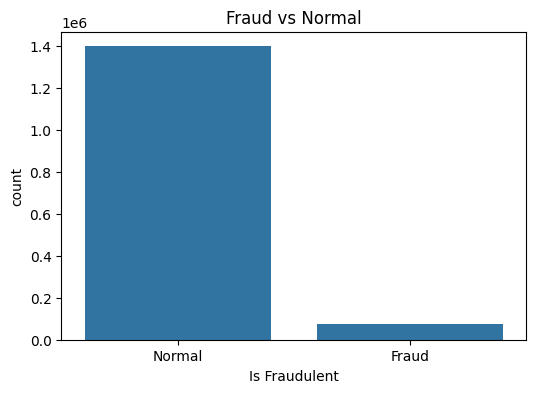

       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        1.472952e+06  1.472952e+06  1.472952e+06   1.472952e+06   
mean         2.267683e+02  3.000230e+00  3.451208e+01   5.012926e-02   
std          2.703951e+02  1.414736e+00  1.000313e+01   2.182117e-01   
min          1.000000e+01  1.000000e+00 -1.600000e+01   0.000000e+00   
25%          6.861000e+01  2.000000e+00  2.800000e+01   0.000000e+00   
50%          1.517600e+02  3.000000e+00  3.500000e+01   0.000000e+00   
75%          2.960500e+02  4.000000e+00  4.100000e+01   0.000000e+00   
max          1.270175e+04  5.000000e+00  8.600000e+01   1.000000e+00   

       Account Age Days  Transaction Hour  
count      1.472952e+06      1.472952e+06  
mean       1.796464e+02      1.128696e+01  
std        1.068642e+02      6.975995e+00  
min        1.000000e+00      0.000000e+00  
25%        8.600000e+01      5.000000e+00  
50%        1.790000e+02      1.100000e+01  
75%        2.720000e+02      1.700000e+01  

In [2]:
# Display basic information
df.info()
print("\nTotal Null:")
print(df.isnull().sum())

# Display target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Is Fraudulent', data=df)
plt.title("Fraud vs Normal")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

# Descriptive statistics
print(df.describe())

# 3. Preprocessing data + SCaling

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop irrelevant columns
df_cleaned = df.drop(columns=[
    "Transaction ID", "Customer ID", "Transaction Date",
    "IP Address", "Shipping Address", "Billing Address"
])

# Encode categorical columns
label_encoders = {}
for col in df_cleaned.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Store X and y
X = df_cleaned.drop("Is Fraudulent", axis=1)
y_true = df_cleaned["Is Fraudulent"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Modelling

## Isolation Forest

=== Isolation Forest ===
[[1392988    6126]
 [  65234    8604]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1399114
           1       0.58      0.12      0.19     73838

    accuracy                           0.95   1472952
   macro avg       0.77      0.56      0.58   1472952
weighted avg       0.94      0.95      0.94   1472952

ROC-AUC Score: 0.5560734405505797


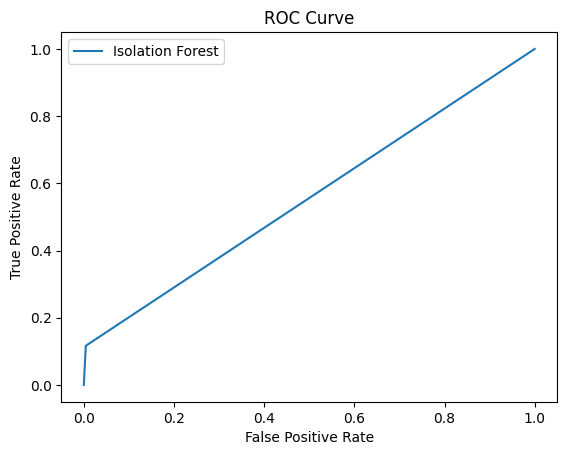

In [6]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the model
isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isf_pred = isf.fit_predict(X_scaled)

# Conversion: -1 to 1 (anomaly), 1 to 0 (normal)
isf_labels = pd.Series(isf_pred).map({1: 0, -1: 1})

# Evaluate
print("=== Isolation Forest ===")
print(confusion_matrix(y_true, isf_labels))
print(classification_report(y_true, isf_labels))
print("ROC-AUC Score:", roc_auc_score(y_true, isf_labels))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, isf_labels)
plt.plot(fpr, tpr, label="Isolation Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Local Outlier Factor (LOF)


=== Local Outlier Factor ===
[[1385809   13305]
 [  72413    1425]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97   1399114
           1       0.10      0.02      0.03     73838

    accuracy                           0.94   1472952
   macro avg       0.52      0.50      0.50   1472952
weighted avg       0.91      0.94      0.92   1472952

ROC-AUC Score: 0.504894708145802


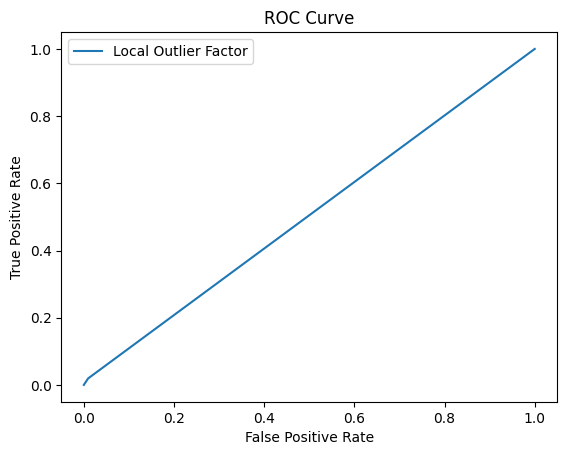

In [7]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_pred = lof.fit_predict(X_scaled)

# Conversion
lof_labels = pd.Series(lof_pred).map({1: 0, -1: 1})

# Evaluate
print("\n=== Local Outlier Factor ===")
print(confusion_matrix(y_true, lof_labels))
print(classification_report(y_true, lof_labels))
print("ROC-AUC Score:", roc_auc_score(y_true, lof_labels))

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, lof_labels)
plt.plot(fpr, tpr, label="Local Outlier Factor")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5. Threshold Tuning ISF